# Codificación de Variables Categóricas

En los análisis de datos, a menudo trabajamos con variables categóricas que toman valores de un conjunto de categorías o etiquetas. Para poder utilizarlas en Modelos de Machine Learnig, es necesario convertirlas en una forma numérica que pueda ser interpretada por estos algoritmos.

Existen diferentes métodos de codificación para variables categóricas, en lo que sigue te presentaré dos de ellos: Codificación Ordinal y la Codificación One-Hot.

## Librerías

In [2]:
import pandas as pd
import numpy as np  
import pandas as pd 
import scipy.stats  
import seaborn as sns 

import sklearn.compose
import sklearn.impute
import sklearn.preprocessing

## Cargar Datos

Trabajamos con un DataFrame de datos preprocesados en otro Notebook. Pertenecen a datos de National Health and Nutrition Examination Survey del período 2017 - 2018

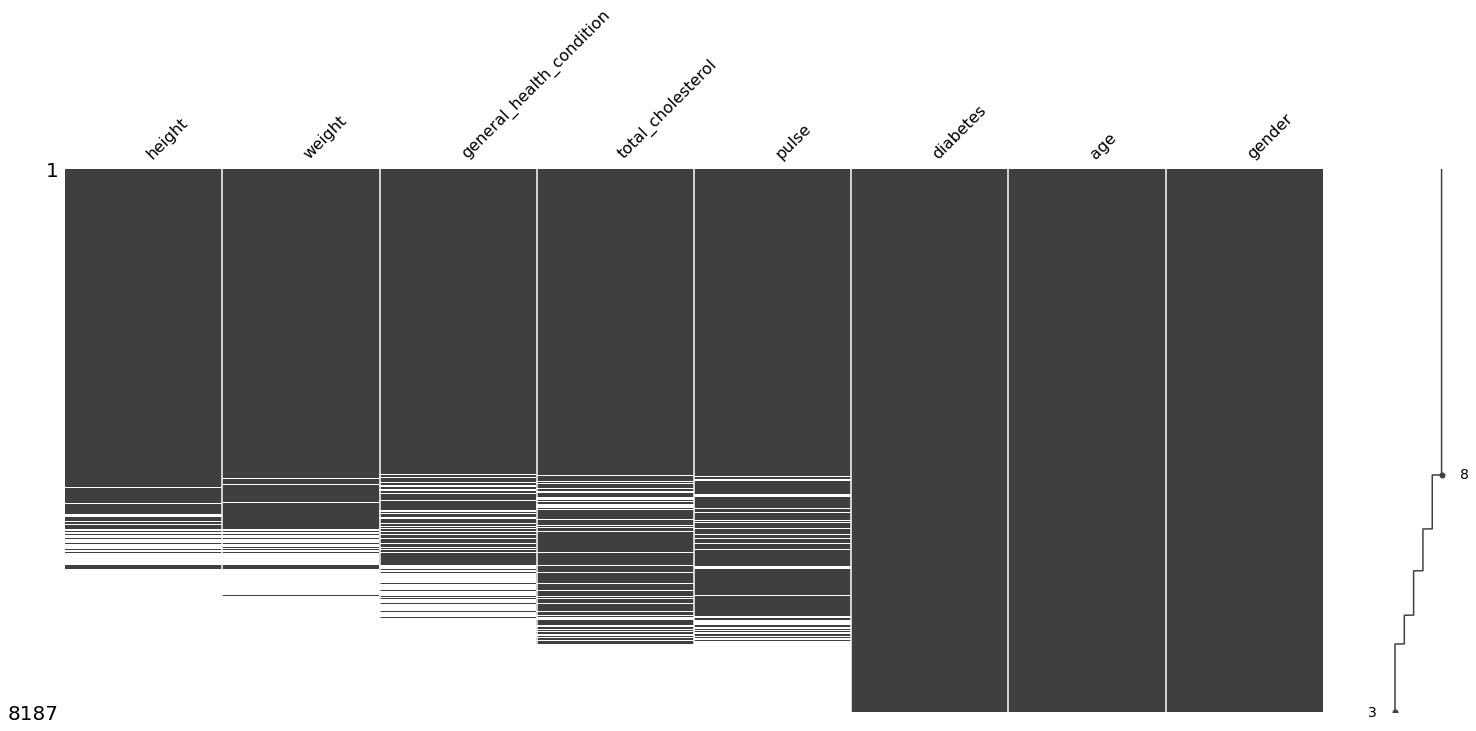

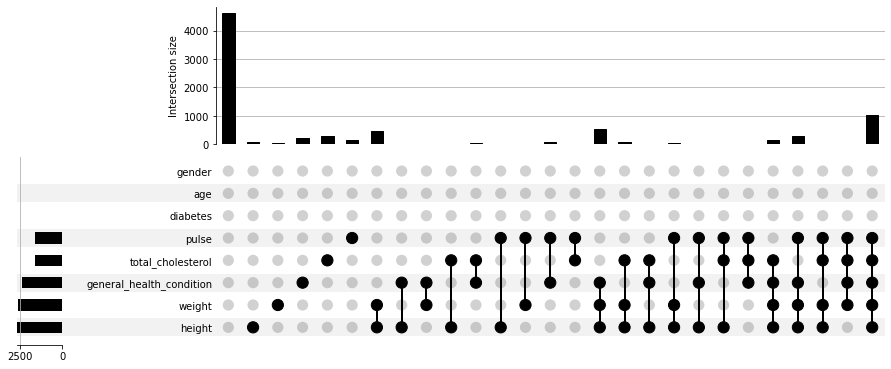

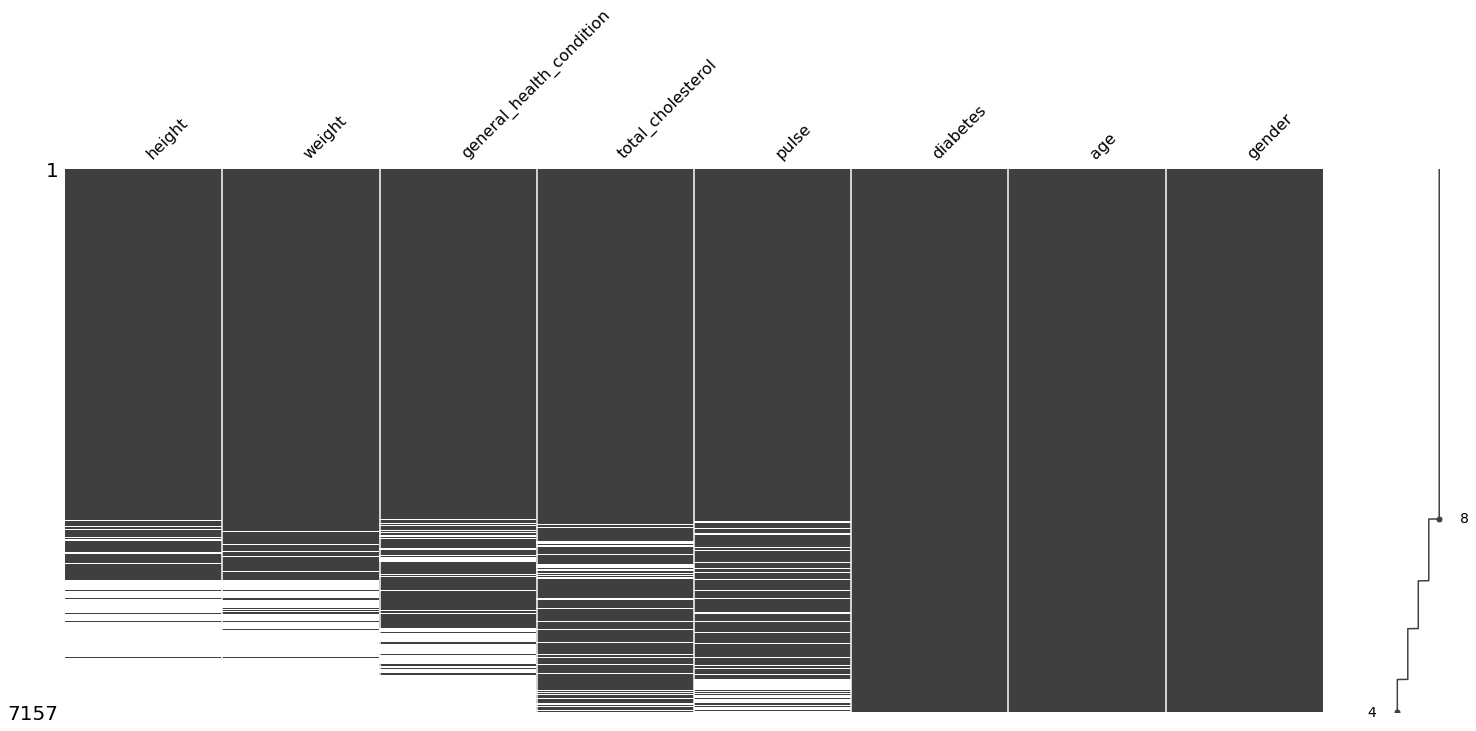

In [3]:
%run download_data_and_load.ipynb

# Codificación Ordinal

Consiste en mapear cada elemento único de texto a un número entero en función de algún orden intrínseco o conocimiento previo. Ejemplo, una variable llamada Tamaño con las categorías "Pequeños", "Mediano" y "Grande", a la que se asignan los números 1,2 y 3 respectivamente. Útil cuando existe un orden lógico entre las categorías como en el ejemplo anterior.

## Codificación Ordinal sobre un DataFrame

- Tenemos el siguiente DataFrame con 8 variables y 7157 registros. 2 de las variables del DataFrame son textos por lo que vamos a codificarlas. Se trata de las variables "general_health_condition" y "gender" 

In [9]:
nhanes_df

,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
93709.0,62.0,200.0,NaN,176.0,74.0,0,75.0,Female
93711.0,69.0,142.0,Very good,238.0,62.0,0,56.0,Male
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,33.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


- Creamos una copia de DataFrame para mantener los datos originales

In [10]:
nhanes_transformed_df = nhanes_df.copy(deep=True)
nhanes_transformed_df

,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
93709.0,62.0,200.0,NaN,176.0,74.0,0,75.0,Female
93711.0,69.0,142.0,Very good,238.0,62.0,0,56.0,Male
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,33.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


- Cuando el DataFrame contiene tantas variables que no se puede determinar a simple vista las variables categóricas, procedemos a seleccionarlas mediante el tipo de dato que por lo general son "object" y "category" y guardarlas en una variable. 

- Para este caso, el DataFrame posee dos variables categóricas: "general_health_condition" y "gender". Como ya las tenemos identificadas, podemos continuar. Sin embargo, para fines prácticos seleccionamos las variables como indica el procedimiento anterior.

In [11]:
categorical_column = nhanes_df.select_dtypes(include=[object, 'category']).columns

categorical_column

Index(['general_health_condition', 'gender'], dtype='object')

- La librería Sklearn trabaja con objetos llamados "Transformador" que son utilizados para realizar transformaciones a los datos. Las transformaciones incluyen cambios en la escala, codificación, imputación de valores faltantes, entre otros. Son flexibles y se pueden encadenar en secuencias para construir flujos de trabajo de preprocesamiento más complejo. 

- Utilizamos la función "make_column_transformer" del módulo "compose" para crear un transformador personalizado que combina múltiples transformaciones y aplica sobre las variables guardadas en "categorical_column". 

- La transformación que vamos a aplicar a los datos es "OrdinalEncoder" que proviene de la clase "preprocessing". Mantenemos sin cambio las demás variables y guardamos en una nueva variable llamada "categorical_transformed".

In [30]:
categorical_transformed = sklearn.compose.make_column_transformer(

    # transformacion                        Variables a transformar
    (sklearn.preprocessing.OrdinalEncoder(), categorical_column),

    # mantener sin cambio las variables no seleccionadas
    remainder='passthrough'
)

categorical_transformed

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['general_health_condition', 'gender'], dtype='object'))])

- Obtenemos el nuevo DataFrame con los datos transformados utilizando el metodo "fit_transform" el cual realiza tanto el ajuste como la transformacion de los datos en un solo paso.

In [13]:
(
    pd.DataFrame(
        categorical_transformed.fit_transform(nhanes_df)
    )
)

,0,1,2,3,4,5,6,7
0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
1,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
2,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
3,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
4,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
7152,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
7153,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
7154,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0
7155,4.0,0.0,NaN,NaN,150.0,74.0,0.0,14.0


- Sustituimos los numeros que representan las variables por sus nombres.

In [32]:
(
    pd.DataFrame(
       categorical_transformed.fit_transform(nhanes_df),
       columns= categorical_transformed.get_feature_names_out(),
       index=nhanes_df.index 
    )
)

,ordinalencoder__general_health_condition,ordinalencoder__gender,remainder__height,remainder__weight,remainder__total_cholesterol,remainder__pulse,remainder__diabetes,remainder__age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


- Las variables en el nuevo DataFrame vienen con prefijos: 'remainder__' para las que no fueron transformadas y 'ordinalencoder' para las transformadas. Modificamos los nombres de cada variable para volver a los nombres originales.

In [14]:
nhanes_transformed_df = (
    pd.DataFrame(
        categorical_transformed.fit_transform(nhanes_df),
        columns=categorical_transformed.get_feature_names_out(),
        index=nhanes_df.index
    )
    .rename_columns(
        function=lambda x: x.removeprefix('ordinalencoder__')
    )
    .rename_columns(
        function=lambda x: x.removeprefix('remainder__')
    )
)

nhanes_transformed_df

,general_health_condition,gender,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


De esta forma llegamos al DataFrame con los valores categoricos transformados: 0 para Female y 1 para Male en la variable Gender y en la variable 'General_health_condition' los valores numericos del 0 al 4. Ahora podemos aplicar los modelos de Machine Learning a los datos y obtener resultados correctos.  

# Codificacion One Hot

Permite convertir variables categoricas en una representacion numerica de manera que puedan ser utilizadas por modelos de Machine Learning. Consiste en crear nuevas columnas binarias (0 o 1) para cada categoria presente en la variable categorica en estudio. El cero 1 indica que la observacion corresponde a una categoria especifica y 0 que no corresponde.

La ventaja de esta codificacion es que evita que los modelos asuman una relacion ordinal o numerica entre las categorias por lo que es importante cuando no existe una relacion de orden real entre ellas.

Existen dos metodos para generar una codificacion One Hot: Metodo con Pandas y Metodo con Sklearn

## Metodo con Pandas

La funcion get_dummies() de Pandas permite realizar la codificacion One Hot en variables categoricas de un DataFrame. Crea nuevas columnas binarias para cada categoria de una variable categorica, lo que permite que los modelos las trabajen con datos numericos. 

La ventaja de este metodo es que es facil de implementar y ofrece una forma rapida de realizar One Hot Encoding. Es importante siempre considerar si el metodo cuenta con el impacto requerido en la dimensionalidad de los datos.

En lo que sigue, aplicamos el metodo al Dataframe de nhanes_df

- Creamos una copia del DataFrame para conservar los datos originales

In [15]:
nhanes_transformed_df2 = nhanes_df.copy(deep=True)

- Seleccionamos la variables categorica, en este caso 'general_health_condition' y aplicamos mediante un pipe la funcion get_dummies()

In [16]:
(
    nhanes_transformed_df2
    .select_columns('general_health_condition')
    .pipe(pd.get_dummies)
)

,general_health_condition_Excellent,general_health_condition_Fair or,general_health_condition_Good,general_health_condition_Poor?,general_health_condition_Very good
SEQN,,,,,
93705.0,0,0,1,0,0
93706.0,0,0,0,0,1
93707.0,0,0,1,0,0
93709.0,0,0,0,0,0
93711.0,0,0,0,0,1
...,...,...,...,...,...
102949.0,1,0,0,0,0
102953.0,0,1,0,0,0
102954.0,0,0,1,0,0


Obtenemos una nueva columna para cada categoria de la variable en cuestion. Las obervaciones que poseen 1 en alguna de las columnas indican que pertenece a esa categoria. en total son 5 columnas que representan las 5 categorias.

### El problema del Metodo de Pandas

Supongamos que estamos interesados en conocer las categorias de las primera 10 observaciones por lo seleccionamos los 10 registros y aplicamos la codificacion como sigue:

In [19]:
(
    nhanes_transformed_df2
    .loc[:,['general_health_condition']]
    .head(10)
    .pipe(pd.get_dummies)
)

,general_health_condition_Fair or,general_health_condition_Good,general_health_condition_Very good
SEQN,,,
93705.0,0,1,0
93706.0,0,0,1
93707.0,0,1,0
93709.0,0,0,0
93711.0,0,0,1
93712.0,0,1,0
93713.0,0,0,1
93714.0,0,1,0
93715.0,1,0,0


Vemos como al considerar solo las 10 primeras observaciones no toma en cuenta las demas categorias, solo las que estan contenidas en las observaciones seleccionadas. En total solo muestra 3 de las 5 categorias lo cual es un problema ya que no considera las restantes. Por tanto, este metodo es util para representar los datos de manera rapida pero para fines practicos donde se requieran operaciones no es recomendable.

## Metodo Sklearn

Similar a la codificacion ordinal con la diferencia que se aplica la transformacion "OneHotEncoder" en vez de "OrdinalEncoder"

Es importante tener en cuenta que esta codificacion puede generar una gran cantidad de variables nuevas en el DataFrame lo que lleva a un aumento en la dimensionalidad en los datos que podria afectar el rendimiento y eficiencia de ciertos modelos.

- Creamos el transformador personalizado el cual aplica la transformacion "OneHotEncoder" sobre las variables dadas, en este caso "general_health_condition" y "gender"

In [24]:
transformer = sklearn.compose.make_column_transformer(

    # transformacion                         variables a transformar
    (sklearn.preprocessing.OneHotEncoder(), ['general_health_condition', 'gender']),
    
    # mantener sin cambio las variables no seleccionadas
    remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['general_health_condition', 'gender'])])

- Para obtener el DataFrame con los datos transformados, utilizamos el metodo "fit_transform" el cual realiza el ajuste y la transformacion de los datos en un solo paso.

In [25]:
(
    pd.DataFrame(
        transformer.fit_transform(nhanes_df)
    )
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7152,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
7153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
7154,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0
7155,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,150.0,74.0,0.0,14.0


- Sustituimos los numeros que representan las variables por sus nombres.

In [27]:
(
    pd.DataFrame(
        transformer.fit_transform(nhanes_df),
        columns=transformer.get_feature_names_out(),
        index=nhanes_df.index
    )
)

,onehotencoder__general_health_condition_Excellent,onehotencoder__general_health_condition_Fair or,onehotencoder__general_health_condition_Good,onehotencoder__general_health_condition_Poor?,onehotencoder__general_health_condition_Very good,onehotencoder__general_health_condition_nan,onehotencoder__gender_Female,onehotencoder__gender_Male,remainder__height,remainder__weight,remainder__total_cholesterol,remainder__pulse,remainder__diabetes,remainder__age
SEQN,,,,,,,,,,,,,,
93705.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


- A los nombres de las variables, al aplicar la transformacion, se agregaron prefijos: 'remainder__' para las que no fueron transformadas y 'ordinalencoder' para las transformadas. Modificamos los nombres de cada variable para volver a los nombres originales y guardamos el nuevo DataFrame en una variable. 

In [29]:
nhanes_transformed_df2 = (
    pd.DataFrame(
        transformer.fit_transform(nhanes_df),
        columns=transformer.get_feature_names_out(),
        index=nhanes_df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix('remainder__')
    )
    .rename_columns(
        function = lambda x: x.removeprefix('onehotencoder__')
    )
)

nhanes_transformed_df2

,general_health_condition_Excellent,general_health_condition_Fair or,general_health_condition_Good,general_health_condition_Poor?,general_health_condition_Very good,general_health_condition_nan,gender_Female,gender_Male,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,,,,,,,
93705.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


Y asi obtenemos el nuevo DataFrame con las variables categoricas codificadas! Ya pueden ser utilizado los datos por un modelo de Machine Learning.

### Acceder a las categorias de la variable codificada

Una vez realizada la codificacion, podemos acceder a las categorias de la variable en cuestion de la siguiente forma:

In [33]:
(
    transformer             # transformador
    .named_transformers_    # nombre de las transformaciones realizadas
    .get('onehotencoder')   # acceder a la transformacion One Hot
    .categories_            # obtener las categorias a las que aplico One Hot
)

[array(['Excellent', 'Fair or', 'Good', 'Poor?', 'Very good', nan],
       dtype=object),
 array(['Female', 'Male'], dtype=object)]